In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [2]:
main_dir = r'C:\Users\illic\Downloads'

In [3]:
# set paths to specific data
WS100_path = os.path.join(main_dir, r'WS100.csv')
WS300_path = os.path.join(main_dir, r'WS300.csv')
Raine_path = os.path.join(main_dir, r'Raine.csv')
L_pcp_path = os.path.join(main_dir, r'Lauchaecker_pcp.txt')

In [4]:
# read data

# read data and convert to utc
WS100 = pd.read_csv(WS100_path, sep=';', index_col=0) # , skiprows=1
WS100.index = pd.to_datetime(WS100.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300 = pd.read_csv(WS300_path, sep=';', index_col=0) # , skiprows=1
WS300.index = pd.to_datetime(WS300.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine = pd.read_csv(Raine_path, sep=';', index_col=0) # , skiprows=1
Raine.index = pd.to_datetime(Raine.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp = pd.read_csv(L_pcp_path, sep='\t', index_col=0) # , skiprows=1
L_pcp.index = pd.to_datetime(L_pcp.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)


C:\Users\illic\AppData\Local\Temp\ipykernel_8984\51367793.py:7: DtypeWarning: Columns (5,6,12,13,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  WS300 = pd.read_csv(WS300_path, sep=';', index_col=0) # , skiprows=1
C:\Users\illic\AppData\Local\Temp\ipykernel_8984\51367793.py:13: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  L_pcp = pd.read_csv(L_pcp_path, sep='\t', index_col=0) # , skiprows=1


In [6]:
type(L_pcp['rr_07'].loc['2020-05-13 12:49:00'])

str

In [23]:
# precipitation_type

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [92]:
for value in L_pcp['rr_07']:
    if value == str:
        print(value)

In [93]:
L_pcp['rr_07'] = L_pcp['rr_07'].astype(float)

In [94]:
L_pcp['rr_07'].min()

0.0

In [95]:
for column in L_pcp.columns:
    L_pcp[column] = L_pcp[column].astype(float)
    L_pcp[column][L_pcp[column] < 0] = np.nan

C:\Users\illic\AppData\Local\Temp\ipykernel_16892\2985932092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L_pcp[column][L_pcp[column] < 0] = np.nan
C:\Users\illic\AppData\Local\Temp\ipykernel_16892\2985932092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L_pcp[column][L_pcp[column] < 0] = np.nan


In [39]:
WS100_columns = WS100.columns
for column in WS100_columns:
    WS100[column] = WS100[column].str.replace(',', '.')
    WS100[column] = WS100[column].astype(float)
    WS100[column][WS100[column] < 0] = np.nan

In [59]:
for column in Raine.columns:
    Raine[column][Raine[column] < 0] = np.nan

In [61]:
Raine['Niederschlagsintensität'].min()

0.0

In [48]:
WS300_columns = WS300.columns
for column in WS300_columns:
    WS300[column] = WS300[column].str.replace(',', '.')
    WS300[column] = WS300[column].astype(float)
    WS300[column][WS300[column] < 0] = np.nan

C:\Users\illic\AppData\Local\Temp\ipykernel_16892\4062145580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS300[column][WS300[column] < 0] = np.nan
C:\Users\illic\AppData\Local\Temp\ipykernel_16892\4062145580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS300[column][WS300[column] < 0] = np.nan
C:\Users\illic\AppData\Local\Temp\ipykernel_16892\4062145580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS300[column][WS

In [57]:
type(Raine['Niederschlagsintensität']['2022-11-03 11:48:00'])

numpy.float64

In [49]:
WS300

,absolute_humidity,air_temperature,ambient_pressure,dewpoint,precipitation,precipitation.1,relative_humidity,absolute_humidity.1,air_temperature.1,ambient_pressure.1,...,precipitation.2,precipitation.3,relative_humidity.1,absolute_humidity.2,air_temperature.2,ambient_pressure.2,dewpoint.2,precipitation.4,precipitation.5,relative_humidity.2
Time,,,,,,,,,,,,,,,,,,,,,
2020-10-23 09:00:00,12.41,13.58,962.10,12.39,0.0,0.0,92.51,12.37,13.52,962.07,...,0.0,0.0,92.57,12.3,13.3,962.02,12.23,0.0,0.0,93.24
2020-10-23 09:01:00,12.37,13.58,962.08,12.34,0.0,0.0,92.21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:02:00,12.40,13.58,962.08,12.37,0.0,0.0,92.41,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:03:00,12.42,13.58,961.99,12.40,0.0,0.0,92.56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:04:00,12.48,13.63,962.01,12.48,0.0,0.0,92.77,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23 08:42:00,8.59,6.67,961.55,6.49,NaN,NaN,98.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23 08:43:00,8.64,6.75,961.57,6.58,NaN,NaN,98.84,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23 08:44:00,8.72,6.88,961.59,6.72,NaN,NaN,98.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# WS100

In [ ]:
L_pcp

In [96]:
L_pcp.to_csv(r'C:\Users\illic\Python\data_hiwi\L_pcp_ready_to_use.csv')

In [97]:
L_pcp_rtu = pd.read_csv(r'C:\Users\illic\Python\data_hiwi\L_pcp_ready_to_use.csv', sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [1]:
L_pcp_rtu['rr_10'].max()

NameError: name 'L_pcp_rtu' is not defined

In [86]:
type(Raine_rtu['Niederschlagsmenge'])

pandas.core.series.Series

In [54]:
WS300_rtu

,absolute_humidity,air_temperature,ambient_pressure,dewpoint,precipitation,precipitation.1,relative_humidity,absolute_humidity.1,air_temperature.1,ambient_pressure.1,...,precipitation.2,precipitation.3,relative_humidity.1,absolute_humidity.2,air_temperature.2,ambient_pressure.2,dewpoint.2,precipitation.4,precipitation.5,relative_humidity.2
Time,,,,,,,,,,,,,,,,,,,,,
2020-10-23 09:00:00,12.41,13.58,962.10,12.39,0.0,0.0,92.51,12.37,13.52,962.07,...,0.0,0.0,92.57,12.3,13.3,962.02,12.23,0.0,0.0,93.24
2020-10-23 09:01:00,12.37,13.58,962.08,12.34,0.0,0.0,92.21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:02:00,12.40,13.58,962.08,12.37,0.0,0.0,92.41,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:03:00,12.42,13.58,961.99,12.40,0.0,0.0,92.56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:04:00,12.48,13.63,962.01,12.48,0.0,0.0,92.77,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23 08:42:00,8.59,6.67,961.55,6.49,NaN,NaN,98.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23 08:43:00,8.64,6.75,961.57,6.58,NaN,NaN,98.84,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23 08:44:00,8.72,6.88,961.59,6.72,NaN,NaN,98.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# WS100_rtu

In [26]:
WS100['precipitation'].min()

0.0

In [43]:
WS300

,absolute_humidity,air_temperature,ambient_pressure,dewpoint,precipitation,precipitation.1,relative_humidity,absolute_humidity.1,air_temperature.1,ambient_pressure.1,...,precipitation.2,precipitation.3,relative_humidity.1,absolute_humidity.2,air_temperature.2,ambient_pressure.2,dewpoint.2,precipitation.4,precipitation.5,relative_humidity.2
Time,,,,,,,,,,,,,,,,,,,,,
2020-10-23 09:00:00,"12,41","13,58","962,1","12,39",0,0,"92,51","12,37","13,52","962,07",...,0,0,"92,57","12,3","13,3","962,02","12,23",0,0,"93,24"
2020-10-23 09:01:00,"12,37","13,58","962,08","12,34",0,0,"92,21",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:02:00,"12,4","13,58","962,08","12,37",0,0,"92,41",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:03:00,"12,42","13,58","961,99","12,4",0,0,"92,56",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23 09:04:00,"12,48","13,63","962,01","12,48",0,0,"92,77",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23 08:42:00,"8,59","6,67","961,55","6,49",0,0,"98,79",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23 08:43:00,"8,64","6,75","961,57","6,58",0,0,"98,84",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-23 08:44:00,"8,72","6,88","961,59","6,72",0,0,"98,9",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
type(WS300_rtu['relative_humidity']['2023-10-23 08:46:00'])

numpy.float64

In [28]:
# Raine

In [29]:
# L_pcp

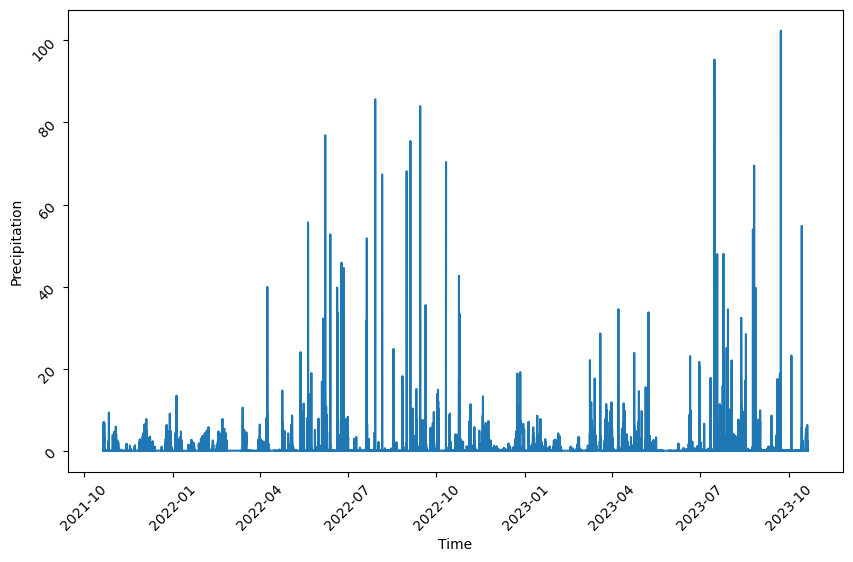

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(WS100_rtu.index, WS100_rtu['precipitation'], label='WS100')
# ax.set_title('Precipitation Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Precipitation')

# max_yticks = 10
# y_values = np.linspace(0, 10, max_yticks)
# ax.set_yticks(y_values)

plt.xticks(rotation=45)
plt.yticks(rotation=45)


plt.show()
plt.close()